In [27]:
!pip install diffusers transformers accelerate torch safetensors

In [28]:
import torch
from diffusers import StableDiffusionPipeline

In [29]:
model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16
)

pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/196 [00:00<?, ?it/s]

CLIPTextModel LOAD REPORT from: /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-v1-5/snapshots/451f4fe16113bff5a5d2269ed5ad43b0592e9a14/text_encoder
Key                                | Status     |  | 
-----------------------------------+------------+--+-
text_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Loading weights:   0%|          | 0/396 [00:00<?, ?it/s]

StableDiffusionSafetyChecker LOAD REPORT from: /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-v1-5/snapshots/451f4fe16113bff5a5d2269ed5ad43b0592e9a14/safety_checker
Key                                               | Status     |  | 
--------------------------------------------------+------------+--+-
vision_model.vision_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


In [30]:
def text_to_image(prompt):

    image = pipe(
        prompt,
        num_inference_steps=30,
        guidance_scale=7.5
    ).images[0]

    return image

  0%|          | 0/30 [00:00<?, ?it/s]

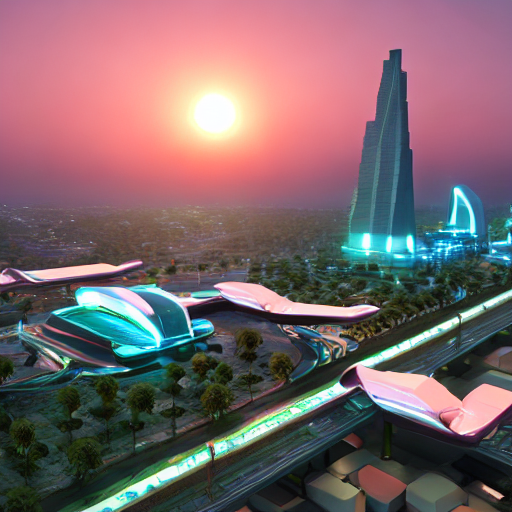

In [31]:
img = text_to_image(
    "A futuristic Indian smart city with flying cars, ultra realistic, sunset lighting"
)

img

In [32]:
img.save("generated_image.png")

  0%|          | 0/30 [00:00<?, ?it/s]

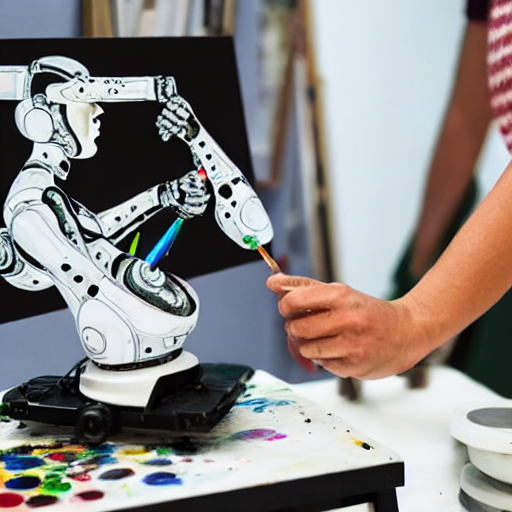

  0%|          | 0/30 [00:00<?, ?it/s]

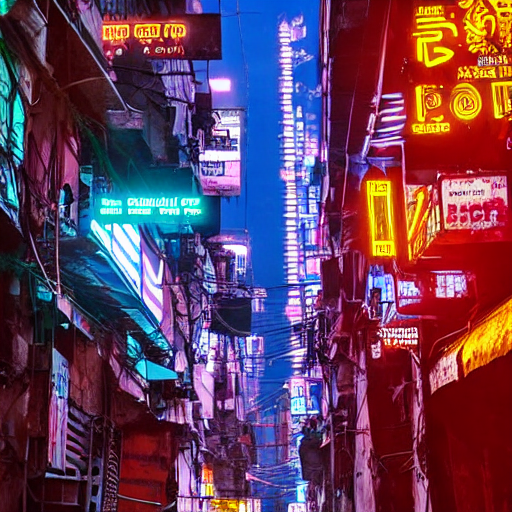

  0%|          | 0/30 [00:00<?, ?it/s]

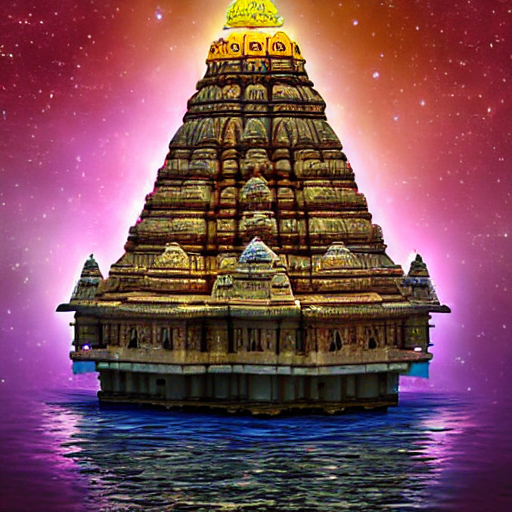

  0%|          | 0/30 [00:00<?, ?it/s]

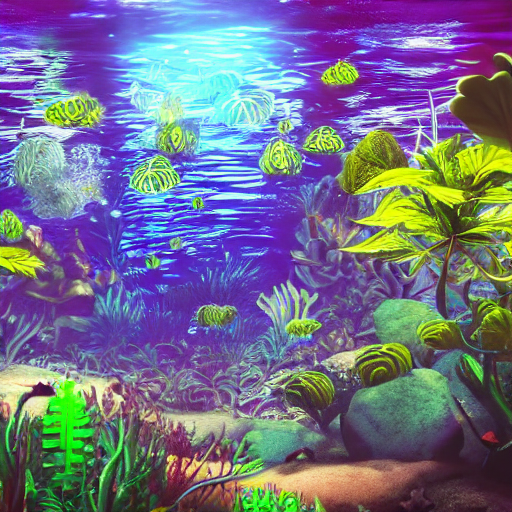

In [33]:
prompts = [
    "AI robot painting a portrait in art studio",
    "Cyberpunk Mumbai street at night with neon lights",
    "Ancient Indian temple floating in space",
    "Underwater palace with glowing plants"
]

for p in prompts:
    display(text_to_image(p))